In [2]:
import numpy as np # библиотека расширенной математики
import scipy as sp # библиотека научных уравнений и констант
from matplotlib import pyplot as plt # создаём короткие псевдонимы
from sklearn import svm as SV
from sklearn.metrics import mean_squared_error as mse
from statistics import mean
import warnings

Чтение данных ...
Подбор коэффициентов ...
Кросс-валидация ...
Кросс-валидация цикл: 1
Кросс-валидация цикл: 2
Кросс-валидация цикл: 3
Кросс-валидация цикл: 4


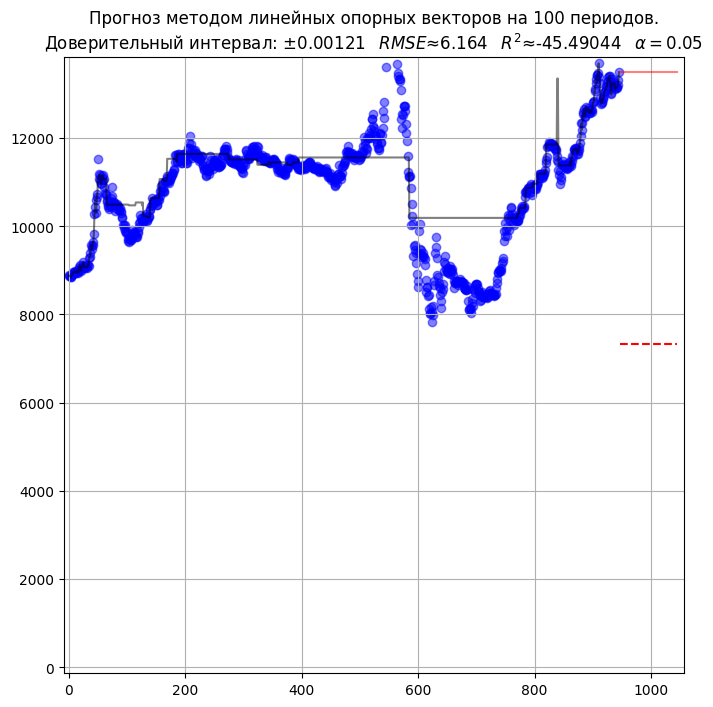

In [3]:
fc = 100  # задаём глубину прогноза (левая точка кросс-валидации)
al = 0.05 # задаём уровень значимости
kf = 1000 # множитель - метод требует целых значений
print("Чтение данных ...")
X=[] # создаем пустой массив значений X
Y=[] # создаем пустой массив значений Y
data = open('CNYRUB_TOM5.csv') # открываем файл на чтение
i = 0 # счётчик элементов выборки
while True: # до тех пор пока файл не закончится
    line = data.readline() # считываем строку
    if not line: # если не удалось (закончился файл)
        data.close() # закрываем файл
        break # и прерываем цикл чтения
    else: # если удалось (файл ещё не закончился)
        Y.append(int(float(line)*kf)) # добавляем значение в массив
        X.append([i]) # добавляем аргумент в массив
        i = i + 1 # подсчитываем объём выборки
n = np.size(Y) # определяем размер выборки
for i in range(n,n+fc): # для аргументов прогноза
            X.append([i]) # добавляем значение аргумента в массив
t=sp.stats.t.ppf(q=1-al/2,df=n-1) # t-множитель доверительного интервала
z=sp.stats.norm.ppf(q=1-al/2) # z-множитель доверительного интервала
print("Подбор коэффициентов ...")
reg = SV.SVC(kernel='linear') # задаём параметры модели прогноза
reg.fit(X[:n], Y ) # запускаем подбор коэффициенов методом ОВ
R = reg.predict(X) # формируем прогноз по подобранным коэффициентам
print("Кросс-валидация ...") # выполняем кросс-валидацию
CVE=[] # MSE прогноза контрольной выборки для каждого цикла
CME=[] # MSE от среднего контрольной выборки для каждого цикла
CMC=[] # среднее значение контрольной выборки
o = int((n/2)/fc) # считаем количество циклов кросс-валидации
if o>5:   # если более пяти
    o = 5 # то ограничиваем до пяти
for j in range(o): # для каждого цикла кросс-валидации
    print("Кросс-валидация цикл:", str(j+1))
    XX = X[:n-(2+j)*fc] # аргументы обучаюшей выборки
    YY = Y[:n-(2+j)*fc] # значения обучающей выборки
    CV = SV.SVC(kernel='linear') # задаём параметры модели кросс-валидации
    CV.fit(XX,YY) # запускаем подбор коэффициенов методом ОВ
    for i in range(np.size(XX), np.size(XX)+fc): # для элементов прогноза
        XX.append([i]) # добавляем значение аргумента в массив
    u = np.size(XX) # новый размер массива
    CVR = CV.predict(XX[u-fc:u]) # формируем прогноз по подобранным коэффициентам
    CMN = mean(YY) # подсчитываем среднее контрольной выборки
    for i in range(u): # для всей выборки
        CMC.append(CMN) # заполняем среднее значение функции
    CVE.append(mse(CVR, Y[u-fc:u])) # получаем средний квадрат ошибки прогноза
    CME.append(mse(CMC[:u],Y[:u])) # получаем средний квадрат отклонения от среднего
# вычисляем доверительный интервал
sigm = np.round((max(CVE)**0.5)/kf,3) # стандартное отклонение прогноза
conf = np.round((t*sigm/((fc)**0.5))/kf,5) # доверительный интервал прогноза
R2 = np.round(1-max(CVE)/min(CME),5) # считаем коэффициент детерминации
plt.rcParams["font.family"] = "Arial" # выбираем шрифт содержащий греки
# формируем строку подписи
t = 'Прогноз методом линейных опорных векторов на '+str(fc)+' периодов.'
t = t +'\nДоверительный интервал: ±'+str(conf)
t = t +'$\;\;\;RMSE≈$'+str(sigm)+'$\;\;\;R^2≈$'+str(R2)+'$\;\;\;α=$'+str(al)
fig, ax = plt.subplots(figsize = (8, 8)) # график, размер в десятках процентов экрана
ax.plot(R[:n], c = 'k', alpha=0.5) # нарисовать график аппроксимации
ax.plot(X[n:n+fc],R[n:n+fc], c = 'r', alpha=0.5) # нарисовать график прогноза
ax.plot(X[n:n+fc],R[n:n+fc]+(sigm*kf), c = 'r', linestyle ='--') # нарисовать границу прогноза сверху
ax.plot(X[n:n+fc],R[n:n+fc]-(sigm*kf), c = 'r', linestyle ='--') # нарисовать границу прогноза снизу
ax.scatter(X[:n], Y, c ='b', alpha=0.5) # построить точки значений выборки синего цвета
ax.grid() # нарисовать координатную сетку
ax.set_title(t) # подписать заголовок графика
ax.set_xlim(0-int(n*0.01), int((n+fc)*1.01)) # ограничить отображение по оси X (от; до)
ax.set_ylim(0-int(np.max(R)*0.01), np.max(R)*1.01) # отображение по оси Y (от; до)
plt.show() # показать, что получилось
warnings.filterwarnings('ignore')